In [107]:
import cv2
import os
import numpy as np
import random
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
% matplotlib inline

In [80]:
from image_process import dataset
from image_process import image_processs
from image_process import prepare_dataset
from image_process import crop

### If want to change the folder name then also change some location variable in the class

"103 and 93 line"  
credit_data/ to you new folder name

In [81]:
train = dataset("credit_data/")
train.make_dir("train")

credit_data/
credit_data/train/0
credit_data/train/1
credit_data/train/2
credit_data/train/3
credit_data/train/4
credit_data/train/5
credit_data/train/6
credit_data/train/7
credit_data/train/8
credit_data/train/9


In [82]:
test = dataset("credit_data/")
train.make_dir("test")

credit_data/
credit_data/test/0
credit_data/test/1
credit_data/test/2
credit_data/test/3
credit_data/test/4
credit_data/test/5
credit_data/test/6
credit_data/test/7
credit_data/test/8
credit_data/test/9


# Prepare Data set
1. n_class : number of classes
2. n_samples : number of smaples for each Class
3. nseq : Seq code for the images
4. image_path = "path of image"
5. dimensioin : in form of tuple  [(top_x, top_y),(bottom_x, bottom_y)]
6. shift : if have a like mine the shift is require (how much shift for second image to crop)
7. Set inv according to your image (Goal is to achive the number font in white with black background)

In [84]:
dataset = prepare_dataset("creditcard_digits2.jpg",dimension=[(0, 0), (35, 48)], shift_dis=(35,35), inv=True)
dataset.train(n_class=10, n_samples=2000, nseq=1)

Complete train class :0
Complete train class :1
Complete train class :2
Complete train class :3
Complete train class :4
Complete train class :5
Complete train class :6
Complete train class :7
Complete train class :8
Complete train class :9


In [94]:
dataset_1 = prepare_dataset("creditcard_digits2.jpg",[(0, 0), (35, 48)], (35,35), inv=True)
dataset_1.test(10, 2000, 1)

Complete test class :0
Complete test class :1
Complete test class :2
Complete test class :3
Complete test class :4
Complete test class :5
Complete test class :6
Complete test class :7
Complete test class :8
Complete test class :9


In [95]:
dataset = prepare_dataset("creditcard_digits1.jpg",[(2, 19), (50, 72)], (59,59), inv=False)
dataset.train(10,2000,2)

Complete train class :0
Complete train class :1
Complete train class :2
Complete train class :3
Complete train class :4
Complete train class :5
Complete train class :6
Complete train class :7
Complete train class :8
Complete train class :9


In [96]:
dataset_1 = prepare_dataset("creditcard_digits1.jpg",[(2, 19), (50, 72)], (59,59), inv=False)
dataset_1.test(10,2000,2)

Complete test class :0
Complete test class :1
Complete test class :2
Complete test class :3
Complete test class :4
Complete test class :5
Complete test class :6
Complete test class :7
Complete test class :8
Complete test class :9


# Testing
image = cv2.imread("creditcard_digits2.jpg",0)   
_, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV +cv2.THRESH_OTSU)    
#cv2.imshow("Image", thresh)    
#cv2.waitKey(0)     
#cv2.destroyAllWindows()     
pro = image_processs()     
roi = [(0,0),(35, 48)]    
top_x = roi[0][0]    
top_y = roi[0][1]     
bottom_x = roi[1][0]    
bottom_y = roi[1][1]    
for i in range(10):     
    if i > 0:    
        top_x = top_x + 35    
        bottom_x = bottom_x + 35     
    roi = image[top_y:bottom_y, top_x:bottom_x]      
    print("{}".format(i))     
    for j in range(2000):     
        roi2 = pro.DigitAugmentation(roi)     
        roi_otsu = pro.processesing(roi2, inv = False)     
        #cv2.imshow("otsu", roi_otsu)      
        cv2.imwrite("./credit_data/train/"+str(i)+"./_1_"+str(j)+".jpg", roi_otsu)     
        cv2.waitKey(0)    
cv2.destroyAllWindows()     


## Creating Model using Keras

In [99]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers


train_data = 'credit_data/train'
test_data = 'credit_data/test'

In [100]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False, rotation_range=10)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data,
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        test_data,
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

Found 40001 images belonging to 10 classes.
Found 40000 images belonging to 10 classes.


In [101]:
# CNN is a Sequential model

model = Sequential()

model.add(Conv2D(30,(6, 6), padding="same", input_shape=(32,32,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(30,(6, 6), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

# 10 is number of output neuron or classes
model.add(Dense(10))
model.add(Activation("softmax"))

In [102]:
model.compile(loss = 'categorical_crossentropy',optimizer = keras.optimizers.Adadelta(), metrics = ['accuracy'])

In [103]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 30)        3270      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 30)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 30)        32430     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 30)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 30)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1920)              0         
__________

In [104]:
# Location to save the model after train
loc = "checkpoint/data.h5"

In [105]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(loc,
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)
model.fit_generator(train_generator, steps_per_epoch=1200, epochs=10, validation_data=validation_generator, validation_steps=800)
model.save(loc)

Epoch 1/10
1200/1200 [==============================] - 33s 28ms/step - loss: 0.0218 - acc: 0.9939 - val_loss: 1.7153e-07 - val_acc: 1.0000
Epoch 2/10
1200/1200 [==============================] - 38s 32ms/step - loss: 4.8700e-06 - acc: 1.0000 - val_loss: 1.5203e-07 - val_acc: 1.0000
Epoch 3/10
1200/1200 [==============================] - 35s 30ms/step - loss: 1.6581e-06 - acc: 1.0000 - val_loss: 1.2647e-07 - val_acc: 1.0000
Epoch 4/10
1200/1200 [==============================] - 38s 32ms/step - loss: 7.9299e-07 - acc: 1.0000 - val_loss: 1.2066e-07 - val_acc: 1.0000
Epoch 5/10
1200/1200 [==============================] - 36s 30ms/step - loss: 7.7288e-07 - acc: 1.0000 - val_loss: 1.2158e-07 - val_acc: 1.0000
Epoch 6/10
1200/1200 [==============================] - 37s 31ms/step - loss: 1.1033e-06 - acc: 1.0000 - val_loss: 1.2074e-07 - val_acc: 1.0000
Epoch 7/10
1200/1200 [==============================] - 37s 31ms/step - loss: 0.0010 - acc: 0.9998 - val_loss: 1.5485e-07 - val_acc: 1.0000


# Crop the Contour image


""or you can also use Software crop images that will also work""  
"For more take a look inside the image_procces class"

(627, 968, 3)


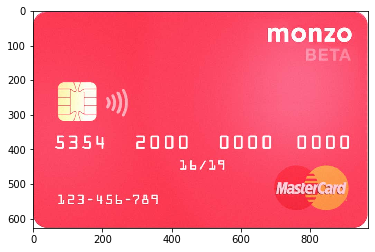

In [111]:
image = cv2.imread('monzo-card.png.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
print(image.shape)
plt.show()

#By hit and try crop the digite strip as i done
#i founnd at ((55, 350), (950, 410)) for below photo

In [14]:
crop_obj = crop()

In [122]:
# To save the Extracted Digit

image = cv2.imread('monzo-card.png.jpg')
# if you have already trimed image the Comment out below line as i have already trimed card (no background stuff)
#image = crop_obj.doc_Scan(image)
region = [(55, 350), (950, 410)]
top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]
roi = image[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
_, roi = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )

# Cheack the crop Number Strip background is anythong but digite in the strip must black
cv2.imshow("Region 1", roi)
cv2.imwrite("extracted_digits_1.jpg", roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [123]:
from keras.models import load_model
import keras
classifier = load_model(loc)

In [124]:
pro = image_processs()

In [127]:
def x_cord_contour(contours):
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return (int(M['m10']/M['m00']))
    else:
        pass

crop_digit = 'extracted_digits_1.jpg'
orignal_full = 'monzo-card.png.jpg'
    
img = cv2.imread(crop_digit)
orig_img = cv2.imread(orignal_full)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_, gray = cv2.threshold(gray, 200, 255, (cv2.THRESH_BINARY + cv2.THRESH_OTSU))
cv2.imshow("image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 30, 150)
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:16] #Change this to 16 to get all digits
contours = sorted(contours, key = x_cord_contour, reverse = False)

full_number = []
for c in contours:
    (x, y, w, h) = cv2.boundingRect(c)
    if w >= 6 and h >= 20 and cv2.contourArea(c) < 1000:
        roi = blurred[y:y + h, x:x + w]
        cv2.imshow("roi", roi)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        roi_otsu = pro.processesing(roi, True)
        roi_otsu = cv2.cvtColor(roi_otsu, cv2.COLOR_GRAY2RGB)
        roi_otsu = keras.preprocessing.image.img_to_array(roi_otsu)
        roi_otsu = roi_otsu * 1./255
        roi_otsu = np.expand_dims(roi_otsu, axis=0)
        image = np.vstack([roi_otsu])
        label = str(classifier.predict_classes(image, batch_size = 10))[1]
        print(label)
        (x, y, w, h) = (x+region[0][0], y+region[0][1], w, h)
        cv2.rectangle(orig_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(orig_img, label, (x , y + 90), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 0), 2)
        cv2.imshow("image", orig_img)
        cv2.waitKey(0)
cv2.destroyAllWindows()

5
3
5
4
2
0
0
0
0
0
0
0
0
0
0
0
